<a href="https://colab.research.google.com/github/gustavo159753/Analise-de-dados/blob/main/boxplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd  # Importa a biblioteca pandas, usada para manipulação e análise de dados tabulares.
import matplotlib.pyplot as plt # Importa a biblioteca matplotlib.pyplot, usada para criar gráficos e visualizações.

In [61]:
intervalos = [[0, 20], [20, 40], [40, 80], [80, 200], [200, 250], [250, 300]] # Define uma lista de listas, onde cada sublista representa um intervalo de classe.
len(intervalos) # Calcula e exibe o número de intervalos na lista.

6

In [62]:
h = [b - a for a, b in intervalos] # Calcula a amplitude (diferença) de cada intervalo usando uma list comprehension.
h # Exibe a lista das amplitudes dos intervalos.

[20, 20, 40, 120, 50, 50]

In [63]:
fi = [6, 9, 2, 14, 8, 7] # Define uma lista com as frequências (fi) de cada intervalo.

In [64]:
fac = [sum(fi[:i]) for i in range(1, len(fi)+1)] # Calcula as frequências acumuladas (fac) usando uma list comprehension.

In [65]:
k1 = 0.25 # Define a constante k1 para o cálculo do primeiro quartil (Q1), representando 25% (0.25).
k3 = 0.75 # Define a constante k3 para o cálculo do terceiro quartil (Q3), representando 75% (0.75).
sum_freq = sum(fi) # Calcula a soma total das frequências.

In [66]:
df = pd.DataFrame( # Cria um DataFrame do pandas para organizar os dados.
    { # Define um dicionário onde as chaves são os nomes das colunas e os valores são as listas de dados.
        "intervalos": intervalos, # Coluna para os intervalos de classe.
        "dif_interv.": h, # Coluna para a diferença (amplitude) dos intervalos.
        "frequencia": fi, # Coluna para as frequências.
        "freq_acum": fac # Coluna para as frequências acumuladas.
    }
  )

In [67]:
df # Exibe o DataFrame completo.

,intervalos,dif_interv.,frequencia,freq_acum
0,"[0, 20]",20,6,6
1,"[20, 40]",20,9,15
2,"[40, 80]",40,2,17
3,"[80, 200]",120,14,31
4,"[200, 250]",50,8,39
5,"[250, 300]",50,7,46


In [68]:
k1q1 = k1 * sum(fi) # Calcula o valor que corresponde a 25% da soma total das frequências (para Q1).
k3q3 = k3 * sum(fi) # Calcula o valor que corresponde a 75% da soma total das frequências (para Q3).
print(f'k1q1 = {k1q1}') # Imprime o valor calculado de k1q1.
print(f'k3q3 = {k3q3}') # Imprime o valor calculado de k3q3.

k1q1 = 11.5
k3q3 = 34.5


In [69]:
# Calculando Q1
# Encontra o índice da primeira linha onde a frequência acumulada (freq_acum) é maior ou igual a k1q1 (25% do total de frequências).
q1 = df[df['freq_acum'] >= k1q1].index[0]
# Seleciona a linha completa do DataFrame 'df' correspondente ao índice encontrado para Q1.
q1_class = df.loc[q1]

# Extrai o limite inferior (primeiro elemento da lista 'intervalos') da classe de Q1.
li_q1 = q1_class['intervalos'][0]
# Calcula a frequência acumulada da classe anterior à classe de Q1. Se for a primeira classe (índice 0), fac_ant_q1 é 0.
fac_ant_q1 = df.loc[q1 - 1, 'freq_acum'] if q1 > 0 else 0
# Extrai a frequência simples (frequencia) da classe de Q1.
fi_q1 = q1_class['frequencia']
# Extrai a amplitude da classe (dif_interv.) da classe de Q1.
h_q1 = q1_class['dif_interv.']

# Aplica a fórmula para calcular Q1: Limite Inferior + ((k1q1 - Freq. Acum. Anterior) / Freq. da Classe) * Amplitude da Classe.
Q1 = li_q1 + ((k1q1 - fac_ant_q1) / fi_q1) * h_q1

# Calculate Q3
# Encontra o índice da primeira linha onde a frequência acumulada (freq_acum) é maior ou igual a k3q3 (75% do total de frequências).
q3 = df[df['freq_acum'] >= k3q3].index[0]
# Seleciona a linha completa do DataFrame 'df' correspondente ao índice encontrado para Q3.
q3_class = df.loc[q3]

# Extrai o limite inferior (primeiro elemento da lista 'intervalos') da classe de Q3.
li_q3 = q3_class['intervalos'][0]
# Calcula a frequência acumulada da classe anterior à classe de Q3. Se for a primeira classe (índice 0), fac_ant_q3 é 0.
fac_ant_q3 = df.loc[q3 - 1, 'freq_acum'] if q3 > 0 else 0
# Extrai a frequência simples (frequencia) da classe de Q3.
fi_q3 = q3_class['frequencia']
# Extrai a amplitude da classe (dif_interv.) da classe de Q3.
h_q3 = q3_class['dif_interv.']

# Aplica a fórmula para calcular Q3: Limite Inferior + ((k3q3 - Freq. Acum. Anterior) / Freq. da Classe) * Amplitude da Classe.
Q3 = li_q3 + ((k3q3 - fac_ant_q3) / fi_q3) * h_q3

# Imprime o valor de Q1 formatado com duas casas decimais.
print(f"Q1 = {Q1:.2f}")
# Imprime o valor de Q3 formatado com duas casas decimais.
print(f"Q3 = {Q3:.2f}")

Q1 = 32.22
Q3 = 221.88


In [46]:
# Calculando Q1
# Encontra o índice da primeira linha onde a frequência acumulada (freq_acum) é maior ou igual a k1q1 (25% do total de frequências).
q1 = df[df['freq_acum'] >= k1q1].index[0]
# Seleciona a linha completa do DataFrame 'df' correspondente ao índice encontrado para Q1.
q1_class = df.loc[q1]

# Extrai o limite inferior (primeiro elemento da lista 'intervalos') da classe de Q1.
li_q1 = q1_class['intervalos'][0]
# Calcula a frequência acumulada da classe anterior à classe de Q1. Se for a primeira classe (índice 0), fac_ant_q1 é 0.
fac_ant_q1 = df.loc[q1 - 1, 'freq_acum'] if q1 > 0 else 0
# Extrai a frequência simples (frequencia) da classe de Q1.
fi_q1 = q1_class['frequencia']
# Extrai a amplitude da classe (dif_interv.) da classe de Q1.
h_q1 = q1_class['dif_interv.']

# Aplica a fórmula para calcular Q1: Limite Inferior + ((k1q1 - Freq. Acum. Anterior) / Freq. da Classe) * Amplitude da Classe.
Q1 = li_q1 + ((k1q1 - fac_ant_q1) / fi_q1) * h_q1

# Calculando Q3
# Encontra o índice da primeira linha onde a frequência acumulada (freq_acum) é maior ou igual a k3q3 (75% do total de frequências).
q3 = df[df['freq_acum'] >= k3q3].index[0]
# Seleciona a linha completa do DataFrame 'df' correspondente ao índice encontrado para Q3.
q3_class = df.loc[q3]

# Extrai o limite inferior (primeiro elemento da lista 'intervalos') da classe de Q3.
li_q3 = q3_class['intervalos'][0]
# Calcula a frequência acumulada da classe anterior à classe de Q3. Se for a primeira classe (índice 0), fac_ant_q3 é 0.
fac_ant_q3 = df.loc[q3 - 1, 'freq_acum'] if q3 > 0 else 0
# Extrai a frequência simples (frequencia) da classe de Q3.
fi_q3 = q3_class['frequencia']
# Extrai a amplitude da classe (dif_interv.) da classe de Q3.
h_q3 = q3_class['dif_interv.']

# Aplica a fórmula para calcular Q3: Limite Inferior + ((k3q3 - Freq. Acum. Anterior) / Freq. da Classe) * Amplitude da Classe.
Q3 = li_q3 + ((k3q3 - fac_ant_q3) / fi_q3) * h_q3

# Imprime o valor de Q1 formatado com duas casas decimais.
print(f"Q1 = {Q1:.2f}")
# Imprime o valor de Q3 formatado com duas casas decimais.
print(f"Q3 = {Q3:.2f}")

Q1 = 32.22
Q3 = 221.88


In [70]:
iqr = Q3 - Q1 # Calcula o Intervalo Interquartil (IQR), que é a diferença entre Q3 e Q1.
print(f"IQR = {iqr:.2f}") # Imprime o valor do IQR formatado com duas casas decimais.

IQR = 189.65


In [71]:
lim_inf = Q1 - 1.5 * iqr # Calcula o limite inferior para identificação de outliers (Q1 - 1.5 * IQR).
lim_sup = Q3 + 1.5 * iqr # Calcula o limite superior para identificação de outliers (Q3 + 1.5 * IQR).
print(f"Lim Inferior = {lim_inf:.2f}") # Imprime o valor do limite inferior formatado com duas casas decimais.
print(f"Lim Superior = {lim_sup:.2f}") # Imprime o valor do limite superior formatado com duas casas decimais.

Lim Inferior = -252.26
Lim Superior = 506.35


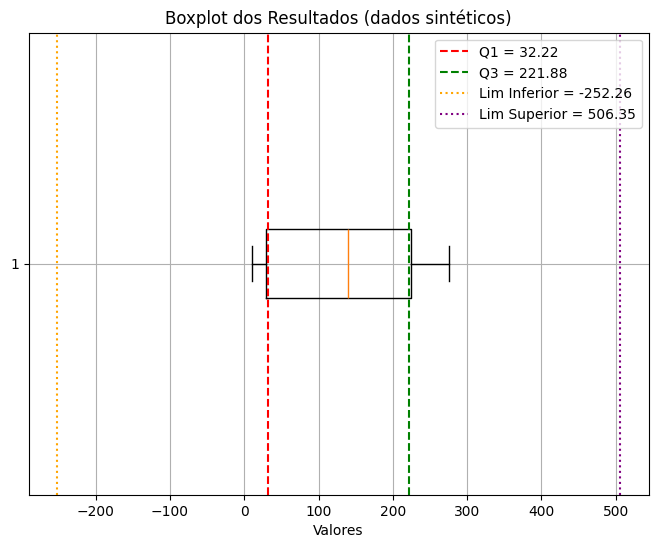

In [72]:
midpoints = [(interval[0] + interval[1]) / 2 for interval in intervalos] # Calcula os pontos médios de cada intervalo de classe.
data_for_boxplot = [] # Inicializa uma lista vazia para armazenar os dados que serão usados no boxplot.
for i in range(len(midpoints)): # Itera sobre os pontos médios e suas frequências.
    data_for_boxplot.extend([midpoints[i]] * fi[i]) # Adiciona cada ponto médio à lista 'data_for_boxplot' um número de vezes igual à sua frequência correspondente.

plt.figure(figsize=(8, 6)) # Cria uma nova figura para o gráfico com um tamanho especificado (8 polegadas de largura, 6 de altura).
plt.boxplot(data_for_boxplot, vert=False) # Gera o boxplot horizontal (vert=False) a partir dos dados sintéticos.
plt.title('Boxplot dos Resultados (dados sintéticos)') # Define o título do boxplot.
plt.xlabel('Valores') # Define o rótulo do eixo X (valores).

# Adicionar os marcadores de Q1, Q3, Limite Inferior e Limite Superior
plt.axvline(Q1, color='red', linestyle='--', label=f'Q1 = {Q1:.2f}') # Adiciona uma linha vertical para Q1, em vermelho e tracejada.
plt.axvline(Q3, color='green', linestyle='--', label=f'Q3 = {Q3:.2f}') # Adiciona uma linha vertical para Q3, em verde e tracejada.
plt.axvline(lim_inf, color='orange', linestyle=':', label=f'Lim Inferior = {lim_inf:.2f}') # Adiciona uma linha vertical para o limite inferior, em laranja e pontilhada.
plt.axvline(lim_sup, color='purple', linestyle=':', label=f'Lim Superior = {lim_sup:.2f}') # Adiciona uma linha vertical para o limite superior, em roxo e pontilhada.

plt.legend() # Exibe a legenda do gráfico, mostrando os rótulos das linhas adicionadas.
plt.grid(True) # Adiciona uma grade ao gráfico para facilitar a leitura.
plt.show() # Mostra o boxplot gerado.

### Exemplo de Interação com Git via Comandos de Shell (Requere Setup Manual e Cuidado com Credenciais)